<a href="https://colab.research.google.com/github/AdrianaCott14/CS_472/blob/main/adri_cottle_lab_1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Lab





In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import pdb


## 1. (40%) Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. do not attempt batch updates)
- Implement a stopping criterion: when your model has trained for a number of epochs with no significant improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Use your perceptron to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident it is correct, run your perceptron on the Evaluation data with the same parameters, and print your final weights and accuracy.

In [ ]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.misclassifications = []
        self.epoch = 0

    def fit(self, X, y, initial_weights=None, epochs=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights(len(X[0])) if not initial_weights else initial_weights

        # Shuffle
        if self.shuffle == True:
          shuffledData = self._shuffle_data(X, y)
           # set new X and y 
          X = shuffledData[:, :-1] # X
          y = shuffledData[:, -1:] # y

        # add the bias at the end of each pattern
        patterns = np.append(X, np.ones((X.shape[0], 1)), axis=1) 

        # go through each row in patterns calc net
        if epochs != None:
          for epoch in range(epochs):
            for row in range(len(patterns)):
              # calc net
              net = 0
              for i in range(len(patterns[row])):
                net += patterns[row][i] * self.weights[i]  
              z = 1 if net > 0 else 0
              # run delta rule if output isn't 0
              if z != y[row]:
                for i in range(len(patterns[row])):
                  self.weights[i] += self.lr * (y[row][0] - z) * patterns[row][i]
        else:
          bContinue = True
          bestAccuracy = 0.0
          counter = 0

          while bContinue == True:
            for row in range(len(patterns)):
              # calc net
              net = 0
              for i in range(len(patterns[row])):
                net += patterns[row][i] * self.weights[i]  
              z = 1 if net > 0 else 0
              # run delta rule if output isn't 0
              if z != y[row]:
                for i in range(len(patterns[row])):
                  self.weights[i] += self.lr * (y[row][0] - z) * patterns[row][i]
                # call score method
            accuracy = self.score(X, y)  
            misclassification = 1 - accuracy           
                # compare to best accuracy, if it isn't better by .05 increase counter
            if abs(accuracy - bestAccuracy) <= .05 :
              counter += 1
            else: 
              counter = 0
            # set new best accuracy
            if bestAccuracy < accuracy:
              bestAccuracy = accuracy
            #if counter is 4 break
            if counter == 6:
              bContinue = False
            if bContinue == True:
              self.epoch += 1
            self.misclassifications.append(misclassification)                
        
        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        # calc the z value using the final weights from the trained model
        patterns = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        predictions = np.empty((len(patterns), 1))
 
        for row in range(len(patterns)):
          net = 0
          for i in range(len(patterns[row])):
            # pdb.set_trace()
            net += patterns[row][i] * self.weights[i]
          z = 1 if net > 0 else 0
          predictions[row] = z

        shape = len(predictions)

        return predictions

    def initialize_weights(self, len):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """ 
        return np.zeros((len + 1), dtype=float)

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = self.predict(X)
        score = 0.0
        numCorrect = 0

        for i in range(len(y)):
          if predictions[i] == y[i]:
            numCorrect += 1.0
        
        score = numCorrect/len(y)


        return score

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        shuffleNP = np.append(X, y, axis=1)
        np.random.shuffle(shuffleNP)

        return shuffleNP

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        # print the weights
        return self.weights

    def split_data(self, X, y):
      # shuffle data 
      shuffledData = self._shuffle_data(X, y)
      # set new X and y 
      X = shuffledData[:, :-1] # X
      y = shuffledData[:, -1:] # y

      # split X_train, X_test, y_train, y_train
      splitPoint = round(0.7 * len(X))

      X_train = X[:splitPoint]
      X_test = X[-(len(X) - splitPoint):]
      y_train = y[:splitPoint]
      y_test = y[-(len(X) - splitPoint):]
 
      return X_test, X_train, y_test, y_train

    def get_epochs(self):
      return self.epoch

## 1.1 Debug and Evaluation

Debug and Evaluate your model using the parameters below

Learning Rate = 0.1\
Deterministic = 10 [i.e., run it 10 epochs and should be the same everytime you run it]\
Shuffle = False\
Initial Weights = All zeros

---

### 1.1.1 Debug

Debug your model by running it on the [debug dataset](https://byu.instructure.com/files/4421290/download?download_frd=1)

Expected Results:

Accuracy = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [ ]:
# Load debug data
data = arff.loadarff('/content/linsep2nonorigin.arff')
df = pd.DataFrame(data[0])
debugDataNP = np.array(df)
debugInputs = debugDataNP[:, :-1].astype(float) # X
debugTargets = debugDataNP[:, -1:].astype(int) # y
# print(debugInputs, "X")
# print(debugTargets, "y")

# Train on debug data
model = PerceptronClassifier(shuffle=False)
model.fit(debugInputs, debugTargets, None, 10)

# Print accuracy and weights
print("Accuracy: ", model.score(debugInputs, debugTargets))
print("Weights: ", model.get_weights())

Accuracy:  0.875
Weights:  [-0.23  0.18 -0.1 ]


### 1.1.2 Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://byu.instructure.com/files/4421294/download?download_frd=1)

In [ ]:
# Load evaluation data
data = arff.loadarff('/content/data_banknote_authentication.arff')
df = pd.DataFrame(data[0])
evalDataNP = np.array(df)
evalInputs = evalDataNP[:, :-1].astype(float) # X
evalTargets = evalDataNP[:, -1:].astype(int) # y
# print(evalInputs, "X")
# print(evalTargets, "y")

# Train on evaluation data
model = PerceptronClassifier(shuffle=False)
model.fit(evalInputs, evalTargets, None, 10)

# Print accuracy and weights
print("Accuracy: ", model.score(evalInputs, evalTargets))
print("Weights: ", model.get_weights())

Accuracy:  0.9876093294460642
Weights:  [-3.80657242 -2.840821   -3.0719334  -1.4003906   4.9       ]


## 2. (30%) Classifying on linearly separable and non-linearly separable data

### 2.1 Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.



In [ ]:
# Create 2 datasets
dataset1 = np.array([[.1, -.7, 1], [.2, .5, 1], [.4, .1, 1], [-.3, .9, 1], [-.7, .4, 0], [-.4, .2, 0], [-.2, -.8, 0], [-.2, -.3, 0]]) # linearly separable
dataset2 = np.array([[-.3, .9, 0], [.6, .4, 0], [.6, -.2, 0], [-.5, -.2, 0], [-.7, .4, 1], [-.7, -.5, 1], [.2, .5, 1], [.5, -.6, 1]]) # non-linearly separable


### 2.2 Train on both sets with your perceptron code (with LR=.1)

In [ ]:
# Train on each dataset

### Dataset 1 ###
dataset1Inputs = dataset1[:, :-1].astype(float) # X
dataset1Targets = dataset1[:, -1:].astype(int) # y
# print(evalInputs, "X")
# print(evalTargets, "y")

# Train on evaluation data
model1 = PerceptronClassifier(shuffle=False)
model1.fit(dataset1Inputs, dataset1Targets)

# Print accuracy and weights
print("Dataset 1")
print("Accuracy: ", model1.score(dataset1Inputs, dataset1Targets))
print("Weights: ", model1.get_weights())

### Dataset 2 ###
dataset2Inputs = dataset2[:, :-1].astype(float) # X
dataset2Targets = dataset2[:, -1:].astype(int) # y
# print(evalInputs, "X")
# print(evalTargets, "y")

# Train on evaluation data
model2 = PerceptronClassifier(shuffle=False)
model2.fit(dataset2Inputs, dataset2Targets)

# Print accuracy and weights
print("Dataset 2")
print("Accuracy: ", model2.score(dataset2Inputs, dataset2Targets))
print("Weights: ", model2.get_weights())

Dataset 1
Accuracy:  1.0
Weights:  [0.42 0.06 0.1 ]
Dataset 2
Accuracy:  0.5
Weights:  [-0.12  0.06  0.1 ]


### 2.3 Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
 - For all graphs always label the axes!
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

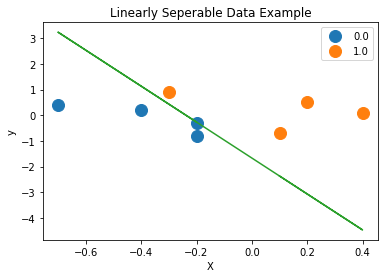

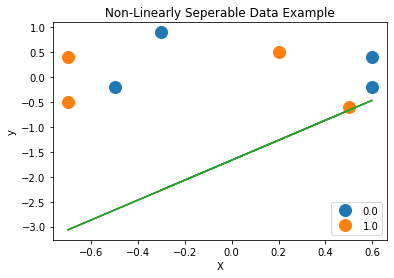

In [ ]:
# Graph datasets and decision lines

### Dataset 1 -- linearly seperable ###
x = dataset1Inputs[:, :-1].astype(float) # X
y = dataset1Inputs[:, 1:].astype(float) # y
dataset1Class = dataset1[:, -1:].astype(int) # determine the color or the dot

w1 = round(model1.get_weights()[0].astype(float), 2)
w2 = round(model1.get_weights()[1].astype(float), 2)
bias = round(model1.get_weights()[2].astype(float), 2)

df = pd.DataFrame(dataset1, columns = ['X','y','Class'])
groups = df.groupby('Class') # sort by class

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

# line of best fit
yline = - (bias/w2) - x * w1 / w2
plt.plot(x, yline)

plt.title('Linearly Seperable Data Example')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

### Dataset 2 -- Non-linearly seperable ###
x = dataset2Inputs[:, :-1].astype(float) # X
y = dataset2Inputs[:, 1:].astype(float) # y
dataset2Class = dataset2[:, -1:].astype(int) # determine the color or the dot

df = pd.DataFrame(dataset2, columns = ['X','y','Class'])
groups = df.groupby('Class') # sort by class

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

w1 = round(model2.get_weights()[0].astype(float), 2)
w2 = round(model2.get_weights()[1].astype(float), 2)
bias = round(model2.get_weights()[2].astype(float), 2)

# line of best fit
yline = - (bias/w2) - x * w1 / w2
plt.plot(x, yline)

plt.title('Non-Linearly Seperable Data Example')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

### 2.4 Discuss why the perceptron won’t converge on non-linearly separable data.

Perceptron is a linear classifier so if it gets fed data that isn't linearly separable, then it won't converge.


## 3. (20%) Use your perceptron code to learn this version of the [voting data set](https://byu.instructure.com/files/4421311/download?download_frd=1).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the 5 trials and the average across the 5 trials in a table.  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .95 | .55 | 4 |
| 2 | .85 | .45 | 6 |
| Average | .9 | .5 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [ ]:
from numpy.lib.shape_base import column_stack
# load data
data = arff.loadarff('/content/voting-dataset.arff')
df = pd.DataFrame(data[0])

df[df == b'y'] = 1
df[df == b'n'] = 0
df[df == b'democrat'] = 1
df[df == b'republican'] = 0
votingDataNP = np.array(df)
votingInputs = votingDataNP[:, :-1].astype(float) # X
votingTargets = votingDataNP[:, -1:].astype(int) # y

df_outputs = pd.DataFrame(columns=['Trial', 'Training Accuracy', 'Test Accuracy', 'Number of Epochs'])
each_train_misclassifications = []

# Train and test
for trial in range(5):
  model = PerceptronClassifier(shuffle=True)
  # split data 
  x_test, x_train, y_test, y_train = model.split_data(votingInputs, votingTargets)

  trainModel = model.fit(x_train, y_train, None, None)
  trainScore = model.score(x_train, y_train)
  epochs = model.get_epochs()
  testScore = model.score(x_test, y_test)

  df_outputs.loc[trial + 1] = [trial + 1, trainScore, testScore, epochs]

  # get misclassification from each epoch and trial
  each_train_misclassifications.append(model.misclassifications)

# Calc Averages
trainAvg = df_outputs['Training Accuracy'].mean()
testAvg = df_outputs['Test Accuracy'].mean()
epochAvg = df_outputs['Number of Epochs'].mean()
data = {'Trial':['Average'], 'Training Accuracy':[trainAvg], 'Test Accuracy':[testAvg], 'Number of Epochs':[epochAvg]}
df_avg = pd.DataFrame(data=data)

# Create the table any way you like
df_outputs = df_outputs.append(df_avg)
df_outputs

,Trial,Training Accuracy,Test Accuracy,Number of Epochs
1,1,0.907121,0.949275,6.0
2,2,0.959752,0.942029,7.0
3,3,0.956656,0.927536,12.0
4,4,0.947368,0.956522,14.0
5,5,0.934985,0.927536,6.0
0,Average,0.941176,0.940580,9.0


### 3.2 By looking at the weights, explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


It seems like the best number of epochs for the model is around 6 and 7, because I notice that when it ran for that amount of time the accuracy scores were the highest. 

### 3.3 Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs).


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [ ]:
# find the average misclassification rate
length = 0

for i in range(5):
  if len(each_train_misclassifications[i]) > length:
    length = len(each_train_misclassifications[i])

for i in range(5):
  each_train_misclassifications[i] = np.pad(each_train_misclassifications[i], (0, (length - len(each_train_misclassifications[i]))))

avg_misclassification = np.average(each_train_misclassifications, axis=0)
each_train_misclassifications

[array([0.09597523, 0.05572755, 0.06501548, 0.06811146, 0.04643963,
        0.05572755, 0.09287926, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.09907121, 0.04334365, 0.0495356 , 0.05882353, 0.0619195 ,
        0.04334365, 0.07430341, 0.04024768, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.0371517 , 0.04024768, 0.06501548, 0.07120743, 0.02786378,
        0.04024768, 0.08978328, 0.02786378, 0.0371517 , 0.02786378,
        0.03095975, 0.02167183, 0.04334365, 0.        , 0.        ]),
 array([0.19504644, 0.05263158, 0.0371517 , 0.0371517 , 0.07120743,
        0.06811146, 0.10835913, 0.10216718, 0.08978328, 0.0619195 ,
        0.05882353, 0.04643963, 0.07739938, 0.08049536, 0.05263158]),
 array([0.10835913, 0.13312693, 0.08049536, 0.07739938, 0.07430341,
        0.06501548, 0.06501548, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.      

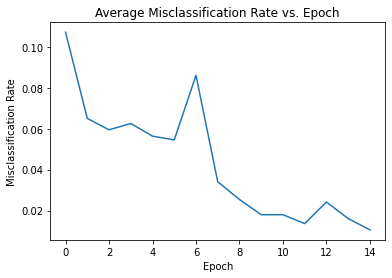

In [ ]:
# Graph here
    
def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

plot_misclassification(avg_misclassification)

## 4.1 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above.
- Report and compare your results with your own perceptron code.

In [ ]:
from sklearn.utils.validation import column_or_1d

# Load sklearn perceptron
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

# Load votinh data
data = arff.loadarff('/content/voting-dataset.arff')
df = pd.DataFrame(data[0])
df[df == b'y'] = 1
df[df == b'n'] = 0
df[df == b'democrat'] = 1
df[df == b'republican'] = 0

votingDataNP = np.array(df)
votingInputs = votingDataNP[:, :-1].astype(float) # X
votingTargets = votingDataNP[:, -1:].astype(int) # y
votingTargets = column_or_1d(votingTargets, warn=True)

# Train on voting dataset
clf = Perceptron(shuffle=True, eta0=0.1)
clf.fit(votingInputs, votingTargets)
print('Accuracy: ', clf.score(votingInputs, votingTargets))


Accuracy:  0.9609544468546638


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*Report your comparison*

## 4.2 (5%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn one other data set of your choice.
- Try out some of the hyper-parameters that scikit-learn makes available.

In [ ]:
from sklearn.utils.validation import column_or_1d

# Load sklearn perceptron
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

# Load votinh data
data = arff.loadarff('/content/hw_gmm_test.arff')
df = pd.DataFrame(data[0])

votingDataNP = np.array(df)
votingInputs = votingDataNP[:, :-1].astype(float) # X
votingTargets = votingDataNP[:, -1:].astype(int) # y
votingTargets = column_or_1d(votingTargets, warn=True)

# Train on voting dataset
clf = Perceptron(shuffle=True, eta0=0.1)
clf.fit(votingInputs, votingTargets)
print('Accuracy: ', clf.score(votingInputs, votingTargets))


Accuracy:  0.881


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


*Report what hyperparameters you experimented with & what performed well*

*   Random state
*   Shuffle
*   tol
*   eta0 for the learning rate







## 5. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://byu.instructure.com/files/4421369/download?download_frd=1) or some other task with more than two possible output values. 

Note that the [iris data](https://byu.instructure.com/files/4421369/download?download_frd=1) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement either of the two most common ways to deal with this. For testing you just execute the novel instance on each model and combine the overall results to see which output class wins.